In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [41]:
data_dir = r"C:\Users\krish\Downloads\DeepFakesDetectionSys\Images"
img_height, img_width = 128, 128
batch_size = 16

In [43]:
# Create a training/validation split using validation_split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [45]:
import os

base = r"C:\Users\krish\Downloads\DeepFakesDetectionSys\Images"
print("Fake images:", len(os.listdir(os.path.join(base, "Fake"))))
print("Real images:", len(os.listdir(os.path.join(base, "Real"))))


Fake images: 100
Real images: 100


In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # 1 neuron for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 128
img_width = 128
batch_size = 4

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    directory=r"C:\Users\krish\Downloads\DeepFakesDetectionSys\Images",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [53]:
import os

data_dir = r"C:\Users\krish\Downloads\DeepFakesDetectionSys"
print("Folders detected as classes:", os.listdir(data_dir))

Folders detected as classes: ['.ipynb_checkpoints', 'Images', 'Untitled1.ipynb']


In [57]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data  # or just train_data if you skipped validation
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.5462 - loss: 0.8006 - val_accuracy: 0.8000 - val_loss: 0.4712
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.8897 - loss: 0.3606 - val_accuracy: 0.8750 - val_loss: 0.4197
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.8560 - loss: 0.4009 - val_accuracy: 0.8750 - val_loss: 0.2016
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9230 - loss: 0.2253 - val_accuracy: 0.9750 - val_loss: 0.1103
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.9334 - loss: 0.1763 - val_accuracy: 0.9000 - val_loss: 0.1420
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9272 - loss: 0.1684 - val_accuracy: 0.9750 - val_loss: 0.0460
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9947 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9771 - loss: 0.0478 - val_accuracy: 0

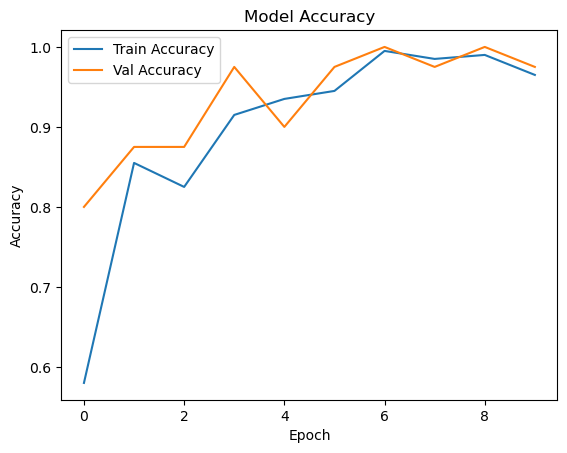

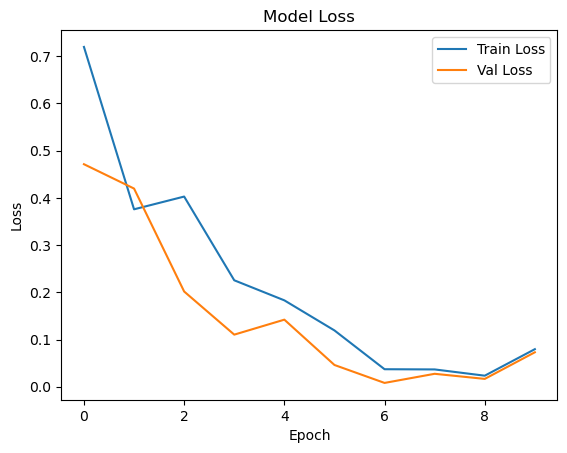

In [59]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
model.save("deepfake_classifier_model.h5")